### Working with Time Series
Pandas was developed in the context of financial modeling, so as you might expect, it
contains a fairly extensive set of tools for working with dates, times, and timeindexed data. Date and time data comes in a few flavors, which we will discuss here:<br>
• Time stamps reference particular moments in time (e.g., July 4th, 2015, at 7:00
a.m.).<br>
• Time intervals and periods reference a length of time between a particular beginning and end point—for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods constituting days).<br>
• Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).
#### Dates and Times in Python
The Python world has a number of available representations of dates, times, deltas, and timespans. While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python.
##### Native Python dates and times: datetime and dateutil
Python’s basic objects for working with dates and times reside in the built-in date time module. Along with the third-party dateutil module, you can use it to quickly perform a host of useful functionalities on dates and times.

In [1]:
# For example, you can manually build a date using the datetime type:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
# Or, using the dateutil module, you can parse dates from a variety of string formats:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
# Once you have a datetime object, you can do things like printing the day of the week:
date.strftime('%A')

'Saturday'

##### Typed arrays of times: Numpy's datetime64
The weaknesses of Python's datetime format inspired the NumPy teamto add a set of native time series data type to NumPy. The datetime64 dtype encodes date as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The datetime64 requires a very specific input format:


In [4]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [5]:
# Once we have this date formatted, however, we can quickly do vectorized operations on it:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

One detail of the datetime64 and timedelta64 objects is that they are built on a fun‐
damental time unit. Because the datetime64 object is limited to 64-bit precision, the
range of encodable times is 264 times this fundamental unit. In other words, date
time64 imposes a trade-off between time resolution and maximum time span.<br
                                                                            >
For example, if you want a time resolution of one nanosecond, you only have enough
information to encode a range of 264 nanoseconds, or just under 600 years. NumPy
will infer the desired unit from the input; 

In [6]:
#for example, here is a day-based datetime:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [7]:
# Here is a minute-based datetime:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [8]:
'''Notice that the time zone is automatically set to the local time on the computer exe‐
cuting the code. You can force any desired fundamental unit using one of many for‐
mat codes; for example, here we’ll force a nanosecond-based time:
'''
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

#### Dates and times in pandas: Best of both worlds
Pandas builds upon all the tools just discussed to provide a Timestamp object, which
combines the ease of use of datetime and dateutil with the efficient storage and
vectorized interface of numpy.datetime64. From a group of these Timestamp objects,
Pandas can construct a DatetimeIndex that can be used to index data in a Series or
DataFrame; we’ll see many examples of this below.


In [9]:
# For example, we can use pandas tools to repeat the demonstration from above. We can parse a flexibly formatted string date, and use format codes to output the day of the week:
import pandas as pd
date = pd.to_datetime('4th of July, 2015')
date

Timestamp('2015-07-04 00:00:00')

In [10]:
date.strftime('%A')

'Saturday'

In [11]:
# Additionally, we can do NumPy-style vectorized operations directly on this same object:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time
Where the pandas time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a Series object that has time-indexed data:

In [12]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0,1 ,2, 3], index = index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [13]:
# Passing values that can be coerced into dates:
data['2014-07-04': '2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [14]:
# There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Strutures
• For time stamps, Pandas provides the Timestamp type. As mentioned before, it is
essentially a replacement for Python’s native datetime, but is based on the more
efficient numpy.datetime64 data type. The associated index structure is
DatetimeIndex.<br>
• For time periods, Pandas provides the Period type. This encodes a fixedfrequency interval based on numpy.datetime64. The associated index structure is
PeriodIndex.<br>
• For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a
more efficient replacement for Python’s native datetime.timedelta type, and is
based on numpy.timedelta64. The associated index structure is TimedeltaIndex.<br>
The most fundamental of these date/time objects are the Timestamp and DatetimeIn
dex objects. While these class objects can be invoked directly, it is more common to
use the pd.to_datetime() function, which can parse a wide variety of formats. Pass‐
ing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by
default yields a DatetimeIndex:

In [15]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                        '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [16]:
'''Any DatetimeIndex can be converted to a PeriodIndex with the to_period() func‐
tion with the addition of a frequency code; here we’ll use 'D' to indicate daily
frequency:'''
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [17]:
# A TimedeltaIndex is created, for example, when one date is subtracted from another:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Regular sequences: pd.date_range()
To make the creation of regular date sequences more convenient, Pandas offers a few
functions for this purpose: pd.date_range() for timestamps, pd.period_range() for
periods, and pd.timedelta_range() for time deltas. We’ve seen that Python’s range() and NumPy’s np.arange() turn a startpoint, endpoint, and optional stepsize
into a sequence. Similarly, pd.date_range() accepts a start date, an end date, and an
optional frequency code to create a regular sequence of dates. By default, the fre‐
quency is one day:

In [18]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
# Alternatively, the date range can be specified not with a start-and endpoint, but with a startpoint and a number of periods:
pd.date_range('2015-07-03', periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
# You can modify the spacing by altering the freq argument, which defaults to D. for examlpe, here we will construct a range of hourly timestamps:
pd.date_range('2015-07-03', periods = 8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [21]:
# To create regular sequences of period or time delta values, the very similar pd.period_range() and pd.timedelta_range() functions are useful.
# Here are some monthly periods:
pd.period_range('2015-07', periods=8, freq='H')

PeriodIndex(['2015-07-01 00:00', '2015-07-01 01:00', '2015-07-01 02:00',
             '2015-07-01 03:00', '2015-07-01 04:00', '2015-07-01 05:00',
             '2015-07-01 06:00', '2015-07-01 07:00'],
            dtype='period[H]')

In [22]:
# And a sequence of durations increasing by an hour:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets
Fundamentals to these pandas time series tools is the concept of a frequency or date offset. Just as we saw the D(day) and H (hour) codes previously, we can use such codes to specify any desired frequency spacing.

In [23]:
'''On top of this, codes can be combined with numbers to specify other frequencies. For
example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and
minute (T) codes as follows:
'''
pd.timedelta_range(0, periods=9,freq='2H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [24]:
'''On top of this, codes can be combined with numbers to specify other frequencies. For
example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and
minute (T) codes as follows:
'''
# for example, we can create a business day offset directly as follows:

from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### Resampling, shifting and Windowing
The ability to use dates and times as indices to intuitively organize and access data is
an important piece of the Pandas time series tools. The benefits of indexed data in
general (automatic alignment during operations, intuitive data slicing and access,
etc.) still apply, and Pandas provides several additional time series–specific
operations.<br>
We will take a look at a few of those here, using some stock price data as an example.
Because Pandas was developed largely in a finance context, it includes some very spe‐
cific tools for financial data. 

In [25]:
# for example, the accompanying pandas-datareader package knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others.
# Here we will load Google's closing price history:
import yfinance as yf

# Replace 'GOOG' with the stock symbol you're interested in
symbol = 'GOOG'

# Define the time range for the data
start_date = '2004-01-01'
end_date = '2016-01-01'

# Fetch the stock data
goog = yf.download(symbol, start=start_date, end=end_date)

# Display the data
print(goog.head())


[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512


In [26]:
# For simplicity, we'll use just the closing price:
goog = goog['Close']

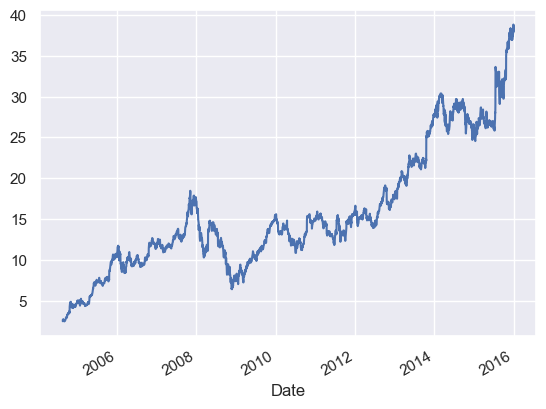

In [27]:
# we can viusalize this using the plot() method, after the normal Matpltlib setup boilerplate:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
goog.plot();

#### Resampling and converting frequencies
one common need for time series data is resampling at a higher or lower frequency. You can do this using the resample() method, or the much simpler asfreq() method. The primary difference the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.
<br>
Taking a look at the Google closing price, lets compare what the two return when we down-sample the data. Here we will resample the data at the end of business year

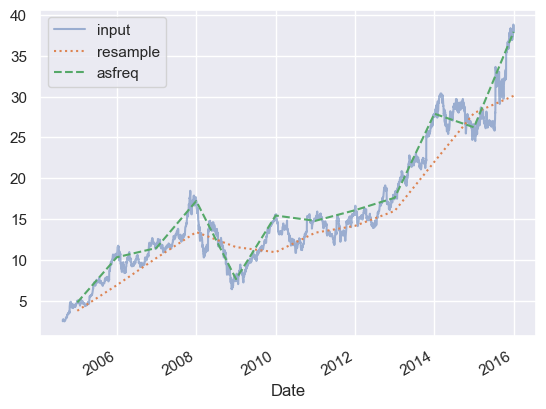

In [28]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input','resample','asfreq'],
           loc='upper left');

For up-sampling, resample() and asfreq() are largely equivalent, though resample
has many more options available. In this case, the default for both methods is to leave
the up-sampled points empty—that is, filled with NA values. Just as with the
pd.fillna() function discussed previously, asfreq() accepts a method argument to
specify how values are imputed. Here, we will resample the business day data at a
daily frequency (i.e., including weekends);

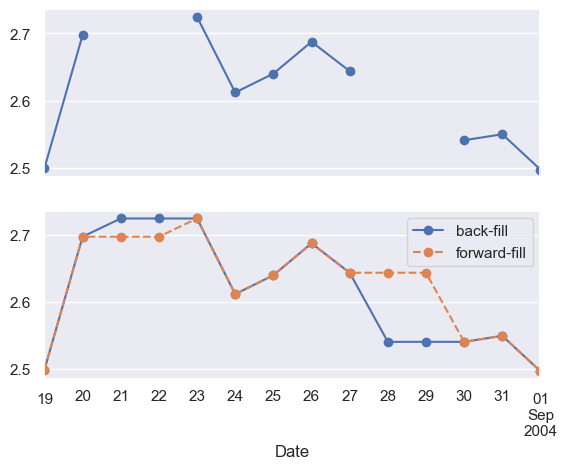

In [29]:
fig, ax = plt.subplots(2, sharex = True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['back-fill','forward-fill']);

#### Time-shifts
Another common time series–specific operation is shifting of data in time. Pandas
has two closely related methods for computing this: shift() and tshift(). In short,
the difference between them is that shift() shifts the data, while tshift() shifts the
index. In both cases, the shift is specified in multiples of the frequency

C:\Users\yugal\AppData\Local\Temp\ipykernel_8092\865950728.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


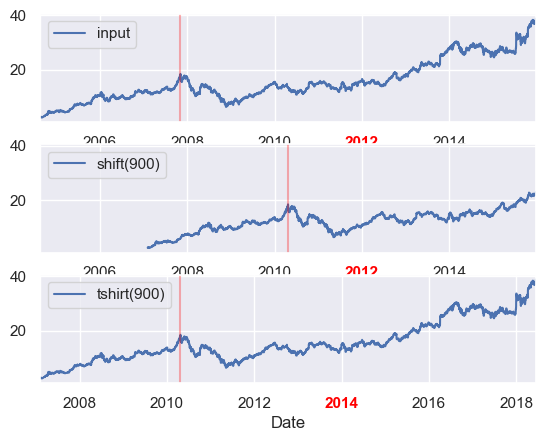

In [30]:

fig, ax = plt.subplots(3, sharey=True)

#apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

#legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color= 'red')
ax[1].axvline(local_max + offset, alpha = 0.3, color = 'red')

ax[2].legend(['tshirt(900)'], loc=2)
ax[2].get_xticklabels()[4].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha = 0.3, color='red')

We see here that shift(900) shifts the data by 900 days, pushing some of it off the
end of the graph (and leaving NA values at the other end), while tshift(900) shifts
the index values by 900 days.<br>
A common context for this type of shift is computing differences over time. For
example, we use shifted values to compute the one-year return on investment for
Google stock over the course of the dataset:

C:\Users\yugal\AppData\Local\Temp\ipykernel_8092\2632432407.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


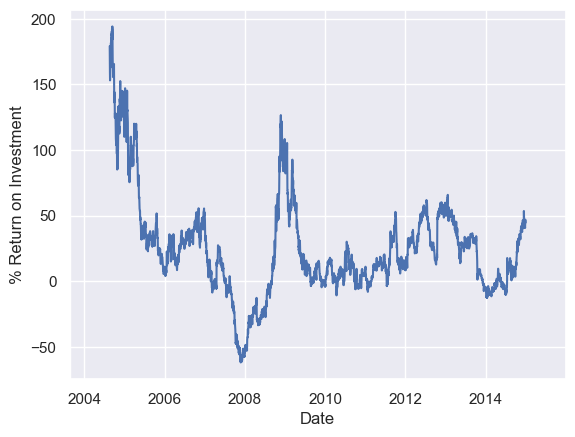

In [31]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

#### Rolling windows
Rolling statistics are a third type of time series–specific operation implemented by
Pandas. These can be accomplished via the rolling() attribute of Series and Data
Frame objects, which returns a view similar to what we saw with the groupby opera‐
tion . This rolling view makes available
a number of aggregation operations by default.

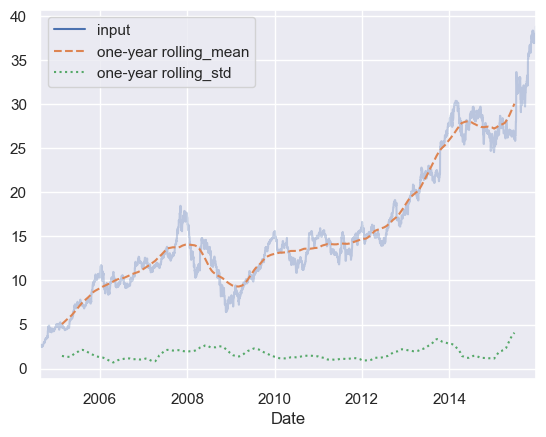

In [32]:
# For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:
rolling = goog.rolling(365, center = True)
data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(), 
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

### Example: Visualizing Seattle Bicycle Counts

In [33]:
data = pd.read_csv("C:/Users/yugal/Downloads/FremontBridge.csv", index_col='Date', parse_dates= True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [34]:
# For covenience, we'll further process this data set by shortening the columns names and adding a 'Total column':
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [35]:
# Now lets take a look at the summary statistics for this data:
data.dropna().describe()

,West,East,Total
count,26225.000000,26225.000000,26225.000000
mean,58.310658,53.605682,111.916339
std,75.671427,76.128342,137.383976
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,17.000000
50%,33.000000,28.000000,64.000000
75%,77.000000,67.000000,149.000000
max,781.000000,667.000000,1050.000000


###### Visualizing the data

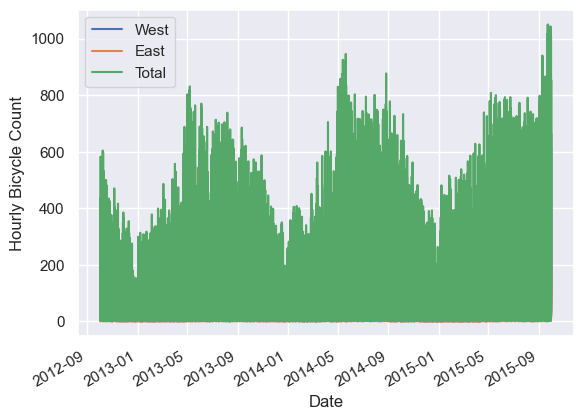

In [36]:
%matplotlib inline
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count');

'This shows us some interesting seasonal trends: as you might expect, people bicycle\nmore in the summer than in the winter, and even within a particular season the bicy‐\ncle use varies from week to wee where we explore this further)'

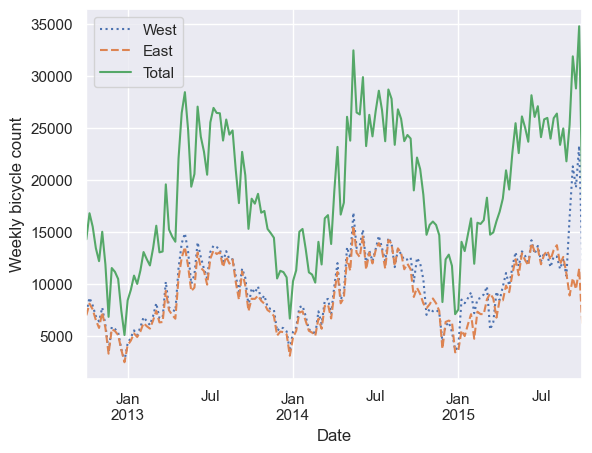

In [37]:
'''The ~25,000 hourly samples are far too dense for us to make much sense of.We can gain more insight by resampling the data to a coarser grid. Let's resample by week '''
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');
'''This shows us some interesting seasonal trends: as you might expect, people bicycle
more in the summer than in the winter, and even within a particular season the bicy‐
cle use varies from week to wee where we explore this further)'''

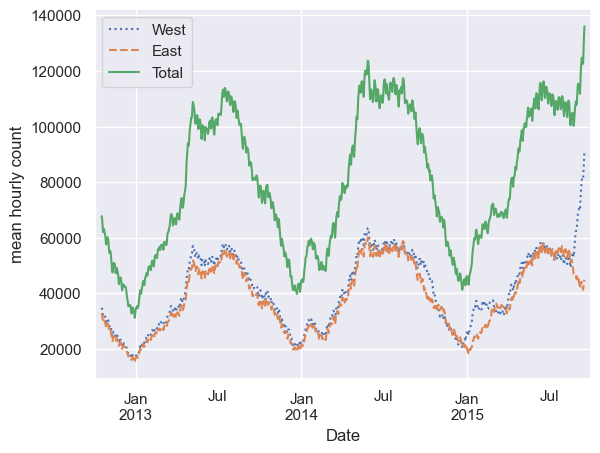

In [38]:
'''Another way that comes in handy for aggregating the data is to use a rolling mean,
utilizing the pd.rolling_mean() function. Here we’ll do a 30-day rolling mean of our
data, making sure to center the window'''
daily = data.resample('D').sum()
daily.rolling(30, center= True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

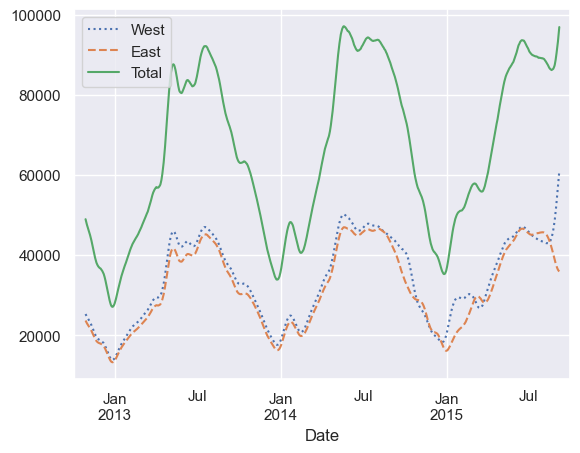

In [39]:
'''The jaggedness of the result is due to the hard cutoff of the window. We can get a
smoother version of a rolling mean using a window function—for example, a Gaus‐
sian window. The following code specifies both the width
of the window (we chose 50 days) and the width of the Gaussian within the window
(we chose 10 days):'''
daily.rolling(50, center= True, 
             win_type = 'gaussian').sum(std = 10).plot(style=[':', '--', '-']);

##### Digging into the data

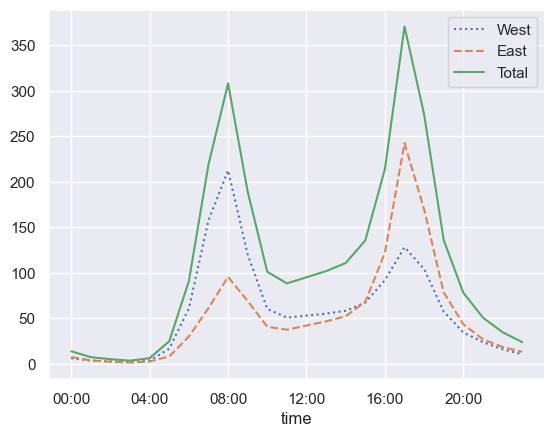

In [40]:
# For example, we might want to look at the average traffic as a function of the time of day.
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style = [':', '--', '-']);

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the
morning and 5:00 in the evening. This is likely evidence of a strong component of
commuter traffic crossing the bridge. This is further evidenced by the differences
between the western sidewalk (generally used going toward downtown Seattle),
which peaks more strongly in the morning, and the eastern sidewalk (generally used
going away from downtown Seattle), which peaks more strongly in the evening

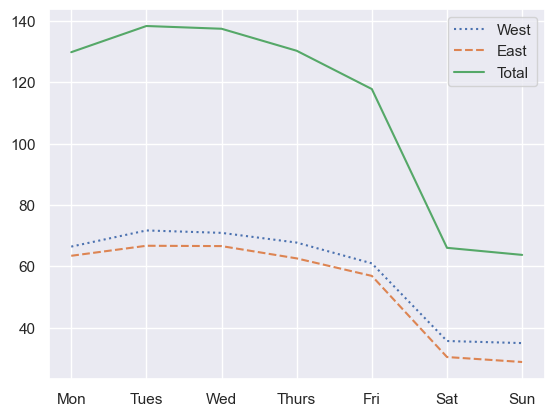

In [41]:
# We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri','Sat', 'Sun']
by_weekday.plot(style = [':', '--', '-']);

This shows a strong distinction between weekday and weekend totals, with around
twice as many average riders crossing the bridge on Monday through Friday than on
Saturday and Sunday. <br>
With this in mind, let’s do a compound groupby and look at the hourly trend on
weekdays versus weekends. We’ll start by grouping by both a flag marking the week‐
end, and the time of day:

In [42]:
weekend = np.where(data.index.weekday < 5, 'weekday', 'weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

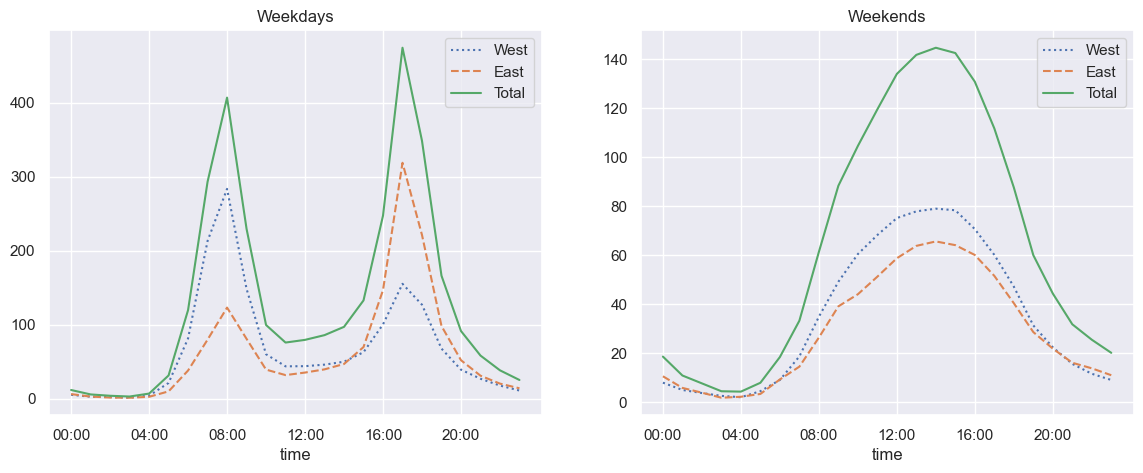

In [43]:
# Now, we'll use some of the Matplotlib tools to plot two panels side by side
import matplotlib.pyplot as plt

# Assuming 'by_time' is a DataFrame
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# For Weekdays
by_time.loc['weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])

# For Weekends
by_time.loc['weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-'])

# Display the plot
plt.show()


The result is very interesting: we see a bimodal commute pattern during the work
week, and a unimodal recreational pattern during the weekends. It would be interest‐
ing to dig through this data in more detail, and examine the effect of weather, temper‐
ature, time of year, and other factors on people’s commuting patterns; for further
discussion, see my blog post “Is Seattle Really Seeing an Uptick In Cycling?”, which
uses a subset of this data.

### High-performance Pandas: eval() and query()
As we’ve already seen in previous chapters, the power of the PyData stack is built upon the ability of NumPy and Pandas to push basic operations into C via an intuitive syntax: examples are vectorized/broadcasted operations in NumPy, and grouping-type operations in Pandas. While these abstractions are efficient and effective for many common use cases, they often rely on the creation of temporary intermediate objects, which can cause undue overhead in computational time and memory use.
<br><br>
Pandas includes some experimental tools that allow you to directly access C-speed operations without costly allocation of intermediate arrays. These are the eval() and query() functions, which rely on the
Numexpr package. In this notebook we will walk through their use and give some rules of thumb about when you might think about using them.

#### Motivating query() and eval(): Compound Expressions
We've seen previously that NumPy and Pandas support fast vectorized operations; for example when you are adding the elements of two arrays:

In [44]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.randint(1E6)
y = rng.randint(1E6)
%timeit x + y

55.4 ns ± 0.824 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [45]:
# But this abstraction can become less efficient when you are computing compound expressions. For example, consider the following expressions:
mask = (x > 0.5) & (y < 0.5)

In [46]:
# Because NumPy evaluates each subexpression, this is roughly euivalent to the following:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In other words, every intermediate step is explicitly allocated in memory. If the x and y
arrays are very large, this can lead to significant memory and computational over‐
head. The Numexpr library gives you the ability to compute this type of compound
expression element by element, without the need to allocate full intermediate arrays.
The Numexpr documentation has more details, but for the time being it is sufficient
to say that the library accepts a string giving the NumPy-style expression you’d like to
compute:

In [47]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & ( y < 0.5)')
np.allclose(mask, mask_numexpr)

True

The benefit here is that Numexpr evaluates the expression in a way that does not use
full-sized temporary arrays, and thus can be much more efficient than NumPy, espe‐
cially for large arrays. The Pandas eval() and query() tools that we will discuss here
are conceptually similar, and depend on the Numexpr package.

#### pandas.eval() for Efficient Operations
The eval() function in pandas uses string expressions to efficiently compute operations using DataFrames. For example, consider the following DataFrames:

In [48]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

In [49]:
# To compute the sum of all four DataFrames using the typical pandas approach, we can just write the sum:
%timeit df1+df2+df3+df4

73.5 ms ± 847 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
# We can compute the same result via pd.eval by constructing the expression as a string:
%timeit pd.eval('df1 + df2 + df3 +  df4')

33.5 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
# The eval() version of this expresssion is about 50% faster (and uses much less memory), while giving the same result:
np.allclose(df1 + df2 + df3 + df4, 
           pd.eval('df1 + df2 + df3 + df4'))

True

##### Operations supported by pd.eval()
To demonstrate these, we'll use the following integer DataFrames:

In [52]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                            for i in range(5))

In [53]:
# Airthemetic operators.
# pd.eval() supports all airthmetics operators. For example:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [54]:
# Comparison operators
# pd.eval() supports all comparison operators, including chained expressions:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [55]:
# Bitwise operators
# pd.eval() supports the & and | bitwise operators:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [57]:
# In addition, it supports the use of the literal and and or in Boolean expressions:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [58]:
# Object attributes and indices:
#pd.eval() supports access to object attributes via the obj.attr syntax, and indexes via the obj[index] syntax:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

### DataFrame.eval() for Column-Wise Operations
Just as Pandas has a top-level pd.eval() function, DataFrames have an eval()
method that works in similar ways. The benefit of the eval() method is that columns
can be referred to by name. We’ll use this labeled array as an example:


In [61]:
df = pd.DataFrame(rng.rand(1000, 3), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
0,0.327752,0.443555,0.349259
1,0.485267,0.059146,0.135625
2,0.843940,0.237838,0.213023
3,0.021839,0.109438,0.335633
4,0.264754,0.080261,0.826190


In [63]:
# Using pd.eval() as above, we can compute expressions with the three columns like this:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B)/ (df.C - 1)")
np.allclose(result1, result2)

True

In [65]:
# The DataFrame.eval() method allows much more succinct evaluation of expressions with the columns:
result3 = df.eval('(A + B)/ (C - 1)')
np.allclose(result1, result3)

True

#### Assignment in DataFrame.eval()

In [67]:
df.head()

,A,B,C
0,0.327752,0.443555,0.349259
1,0.485267,0.059146,0.135625
2,0.843940,0.237838,0.213023
3,0.021839,0.109438,0.335633
4,0.264754,0.080261,0.826190


In [71]:
# we can use df.eval() to create a new column 'D' and assign to it a value computed from the other columns:
df.eval('D = (A + B) / C', inplace = True)
df.head()

,A,B,C,D
0,0.327752,0.443555,0.349259,2.208411
1,0.485267,0.059146,0.135625,4.014115
2,0.843940,0.237838,0.213023,5.078231
3,0.021839,0.109438,0.335633,0.391132
4,0.264754,0.080261,0.826190,0.417598


In [74]:
# In the same way, any existing column can be modified:
df.eval('D = (A - B)/ C', inplace = True)
df.head()

,A,B,C,D
0,0.327752,0.443555,0.349259,-0.331567
1,0.485267,0.059146,0.135625,3.141920
2,0.843940,0.237838,0.213023,2.845249
3,0.021839,0.109438,0.335633,-0.260995
4,0.264754,0.080261,0.826190,0.223307


##### Local variables in DataFrame.eval()
The DataFrame.eval() method supports an additional syntax that lets it work with local Python variables. Consider the following:

In [77]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

The @ character here marks a variable name rather than a column name, and lets you
efficiently evaluate expressions involving the two “namespaces”: the namespace of
columns, and the namespace of Python objects. Notice that this @ character is only
supported by the DataFrame.eval() method, not by the pandas.eval() function,
because the pandas.eval() function only has access to the one (Python) namespace

### DataFrame.query() Method

In [78]:
# The DataFrame has another method based on evaluated strings, called the query() method. Consider the following:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

As with the example used in our discussion of DataFrame.eval(), this is an expres‐
sion involving columns of the DataFrame. It cannot be expressed using the Data
Frame.eval() syntax, however! Instead, for this type of filtering operation, you can
use the query() method:

In [79]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1 , result2)

True

In addition to being a more efficient computation, compared to the masking expres‐
sion this is much easier to read and understand. Note that the query() method also
accepts the @ flag to mark local variables:

In [80]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True